<a href="https://colab.research.google.com/github/JH22222/DAP__/blob/main/DAP_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

Reference

https://www.kaggle.com/chingchunyeh/suicide-rates-overview-1985-to-2016

## [Get the Data](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/version/1?select=master.csv)

---
1985년 ~ 2016년 자살 개요
연도별, 국가별 자살과 사회경제적 정보를 비교.

국가 / 연도 / 성별 / 연령 그룹 / 자살 수 / 인구 / 자살률 / 국가-연도 /  연도별 HDI(행복지수) / 연간 GDP / 1인당 GDP / 세대(연령 그룹 평균 기준).

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/JH22222/toSubmission/main/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


특정 행의 이름들을 재정의 하였다.

In [14]:
df.rename(columns={'suicides/100k pop' : 'suicides_rate', 'HDI for year' : 'HDIforyear', 'gdp_for_year ($)' : 'gdp_for_year', 
                        'gdp_per_capita ($)' : 'gdp_per_capita' }, inplace=True)


## 한국의 지표들 추출

In [15]:
kor = (df.country == 'Republic of Korea')
df_kor = df[kor]
df_kor

,country,year,sex,age,suicides_no,population,suicides_rate,country-year,HDIforyear,gdp_for_year ($),gdp_per_capita,generation
20230,Republic of Korea,1985,male,75+ years,42,154800,27.13,Republic of Korea1985,NaN,"100,273,097,170",2731,G.I. Generation
20231,Republic of Korea,1985,male,55-74 years,393,1498300,26.23,Republic of Korea1985,NaN,"100,273,097,170",2731,G.I. Generation
20232,Republic of Korea,1985,male,35-54 years,903,4285700,21.07,Republic of Korea1985,NaN,"100,273,097,170",2731,Silent
20233,Republic of Korea,1985,male,25-34 years,655,3616800,18.11,Republic of Korea1985,NaN,"100,273,097,170",2731,Boomers
20234,Republic of Korea,1985,male,15-24 years,678,4413000,15.36,Republic of Korea1985,NaN,"100,273,097,170",2731,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
20597,Republic of Korea,2015,female,35-54 years,1372,8337331,16.46,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Generation X
20598,Republic of Korea,2015,male,15-24 years,421,3580725,11.76,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Millenials
20599,Republic of Korea,2015,female,15-24 years,256,3211732,7.97,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Millenials
20600,Republic of Korea,2015,male,5-14 years,17,2523952,0.67,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Generation Z


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


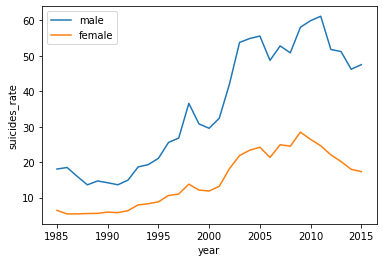

In [16]:
import seaborn as sns

df_kor_men = df_kor[(df_kor.sex == "male")]
df_kor_women = df_kor[(df_kor.sex == "female")]
sns.lineplot(df_kor_men.year, df.suicides_rate, ci = None)
sns.lineplot(df_kor_women.year, df.suicides_rate, ci = None)
plt.legend(["male", 'female'])
plt.show()

대한민국 인구의 전체적인 자살율 현황을 그려보았다. 시간이 지남에 따라 상승하는 것을 볼 수 있고, 21세기에 들어서 증가치가 급격히 상승하는 것을 볼 수 있다. 
2010년부터 전체적인 자살률이 감소하는 경향 또한 볼 수 있다.
더불어 남성과 여성의 자살률의 차이 또한 볼 수 있다. 남성의 자살률은 여성의 자살률의 2배에 해당하는 값들을 가지고 있다고 볼 수 있다.

In [17]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


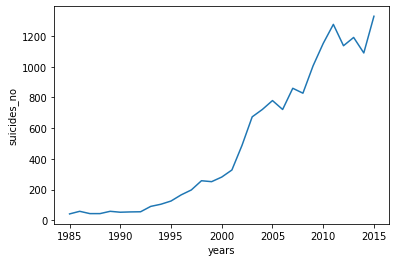

In [18]:
condition = (df.sex == 'male') & (df.age == '75+ years')
df_kor_y75 = df_kor[condition]
plt.plot(df_kor_y75.year, df_kor_y75.suicides_no)
plt.xlabel('years')
plt.ylabel('suicides_no')
plt.show()

간단하게 한국의 75세 이상 남성들의 자살 현황을 그래프로 그려보았다. 


전체적으로 자살 현황이 연도가 증가함에따라 같이 증가하는 경향을 보였다. 하지만 여기서 인구 수 증가를 생각하지 않을 수 없다. 그래서 인구 수 증가에 따른 자살률을 그려볼 수 있었다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


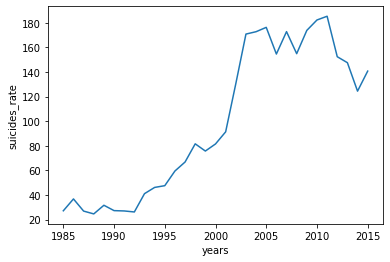

In [19]:
df_kor_y75 = df_kor[condition]
plt.plot(df_kor_y75.year, df_kor_y75.suicides_rate)
plt.xlabel('years')
plt.ylabel('suicides_rate')
plt.show()

2000년대 초반에 급격하게 자살률이 높아진 것을 확인할 수 있지만, 그 이후 자살률은 유지가되다, 2010년대에 들어서자 감소하는 추세를 확인할 수 있다. 따라서 2010년대를 기준으로 75세 이상의 남성 자살률은 증가하다가 감소하는 추세라고 말할 수 있다. 이를 통해 앞으로의 비교 통계치는 자살률을 통해 비교해 보도록 하겠다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


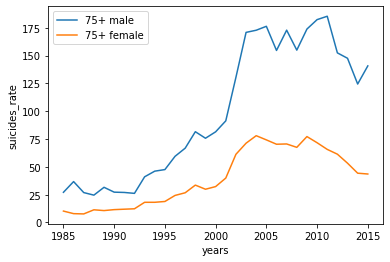

In [20]:
con_male = condition
con_female = (df.sex == 'female') & (df.age == '75+ years')
y_male = df_kor[con_male]
y_female = df_kor[con_female]
plt.plot(df_kor_y75.year, y_male.suicides_rate, label = '75+ male')
plt.plot(df_kor_y75.year, y_female.suicides_rate, label = '75+ female')
plt.xlabel('years')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()

한국의 75세 이상 여성의 자살률과도 같이 그래프를 그려보았다. 사망 비율은 남성보다 현저히 적게 보이지만, 증가 감소 추세는 비슷하게 지속적으로 증가하는 것처럼 보이다가 2000년대에 들어서서 유지되고, 2010년을 기점으로 감소하고 있다.

이로써 한국의 노인(75+) 자살률은 감소하고 있다고 말할 수 있다.

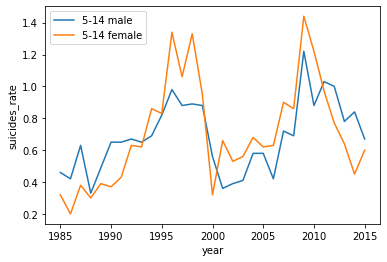

In [21]:
ym = df_kor[(df_kor.sex == 'male') & (df_kor.age == '5-14 years')]
yf = df_kor[(df_kor.sex == 'female') & (df_kor.age == '5-14 years')]
plt.plot(ym.year, ym.suicides_rate, label = '5-14 male')
plt.plot(yf.year, yf.suicides_rate, label = '5-14 female')
plt.xlabel('year')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()


한국의 어린 아이들(5-14세)의 남, 여 자살률의 그려보았다. 10만명 당 0.2~1.4명의 아이들의 자살이 꾸준히 보여지고 있다. 이 그래프 자료에 따르면 어린 아이들의 자살률은 시간이 지남에 따라 상승 및 감소하는 추세를 알 수가 없고, 꾸준히 적은 수의 아이들의 자살이 이루지는 것을 볼 수 있따. 

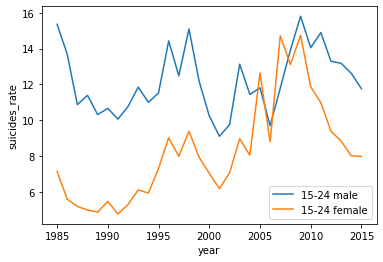

In [22]:
ym = df_kor[(df_kor.sex == 'male') & (df_kor.age == '15-24 years')]
yf = df_kor[(df_kor.sex == 'female') & (df_kor.age == '15-24 years')]
plt.plot(ym.year, ym.suicides_rate, label = '15-24 male')
plt.plot(yf.year, yf.suicides_rate, label = '15-24 female')
plt.xlabel('year')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()


다음으로 대한민국 청소년(15-24세)의 남, 여 자살률이다. 이 그래프에서는 남자의 자살률은 10~16명 사이에서 그래프가 그려지는 것을 볼 수 있다. 이는 대한민국 남자 청소년의 자살률의 변동치는 크게 변화가 없다는 것을 볼 수 있다. 반면 대한민국 여자 청소년의 자살률은 1985년에 비해 2000년대 초반 급격히 상승해 2배 가까이 자살률이 상승한 것을 볼 수 있다. 하지만 2010년대에 들어서며 또한 급격하게 하락하는 것을 볼 수 있다.

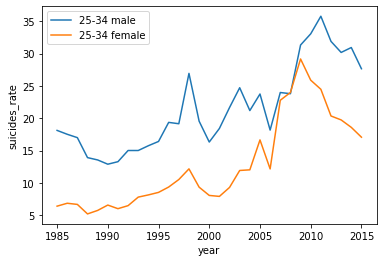

In [23]:
ym = df_kor[(df_kor.sex == 'male') & (df_kor.age == '25-34 years')]
yf = df_kor[(df_kor.sex == 'female') & (df_kor.age == '25-34 years')]
plt.plot(ym.year, ym.suicides_rate, label = '25-34 male')
plt.plot(yf.year, yf.suicides_rate, label = '25-34 female')
plt.xlabel('year')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()

위의 그래프는 대한민국 청년(25-34)의 자살률 현황이다. 여자 남자 둘다 1980년대에 비해 2배, 3배 가량 상승한 것을 볼 수 있다. 위에서 보았던 청소년의 자살률과 비슷한 양상으로 보이며, 2000년대 초반부터 급격히 상승했다, 2010년 언저리 부터 하락하는 것을 확인할 수 있다. 

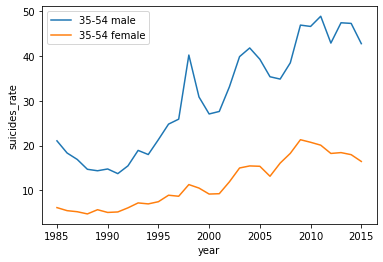

In [24]:
ym = df_kor[(df_kor.sex == 'male') & (df_kor.age == '35-54 years')]
yf = df_kor[(df_kor.sex == 'female') & (df_kor.age == '35-54 years')]
plt.plot(ym.year, ym.suicides_rate, label = '35-54 male')
plt.plot(yf.year, yf.suicides_rate, label = '35-54 female')
plt.xlabel('year')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()

대한민국 중년층(35-54)의 자살률은 위의 청소년, 청년 층과는 다른 양상을 보인다. 
물론 상승치가 보이는 것은 비슷하지만, 중년층의 자살률은 지속적으로 꾸준히 상승하는 것을 볼 수 있다. 특이한 점으로는 1995년~2000년대 사이에 대한민국 남성 중년층의 자살률이 급격하게 상승했다, 다시 감소하는 모습이 보이는데, 이는 1997년 IMF사태로 인해 직장을 잃고, 생활고에 시달렸던 가장들이 자살하는 경우가 늘어나 이러한 [양상](https://https://www.mk.co.kr/news/home/view/1999/08/68766/)이 보인 것으로 판단된다. 이는 전에 그렸던 청년층의 남성 자살률에도 표시가 되어있긴하지만, 현실적으로 가장의 역활이 큰 중녀층의 자료에서 크게 나타나는 것으로 보인다.

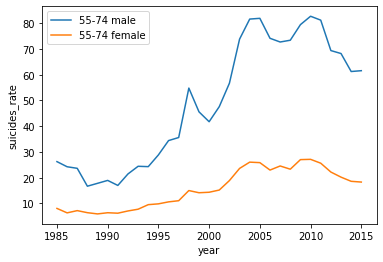

In [25]:
ym = df_kor[(df_kor.sex == 'male') & (df_kor.age == '55-74 years')]
yf = df_kor[(df_kor.sex == 'female') & (df_kor.age == '55-74 years')]
plt.plot(ym.year, ym.suicides_rate, label = '55-74 male')
plt.plot(yf.year, yf.suicides_rate, label = '55-74 female')
plt.xlabel('year')
plt.ylabel('suicides_rate')
plt.legend()
plt.show()

마지막으로 노년층의 자살률이다. 대한민국 여성 노년층의 자살률은 크게 변화가 없고, 낮은 수치로 나타나지만, 남성 노년층의 자살률은 2000년대에 초반에 급격하게 상승하는것을 볼 수 있다. 또한 남성의 자료에서 위의 중년층 그래프에서도 보여지던 imf때의 특이점 또한 동일하게 보여지고 있다.

결과적으로 어린이 나이대를 제외하고는 대부분의 나이대에서 자살률이 증가하는 모습이 보이고, 2010년을 기준으로 감소하는 모습 또한 동일하게 보인다. 또한 모든 그래프에서 그랬듯이, 여성보다는 남성의 자살률이 높은 것으로 나타난다.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


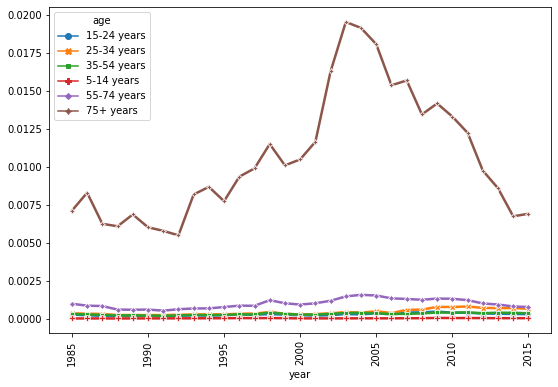

In [26]:
df_kor_age = df_kor.groupby(["year","age"])["suicides_rate", "population"].sum()
df_kor_reset = df_kor_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_kor_reset.suicides_rate*100/df_kor_reset.population, hue = "age",
             data = df_kor_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

이번에는 성별대신, 각 나이대 별로 비교를 해보았다. 
이 그래프에서는 노인층(75+세)에서의 자살률이 다른 나이대에 비해 매우 큰 수치로 보이는 것을 알 수 있다. 하지만, 다른 나이대의 자살률이 노인의 자살률보다 매우 작은 수치로 나타나, 정확한 비교가 어렵다. 이를 보완하기 위해 barplot으로 그려보겠다.

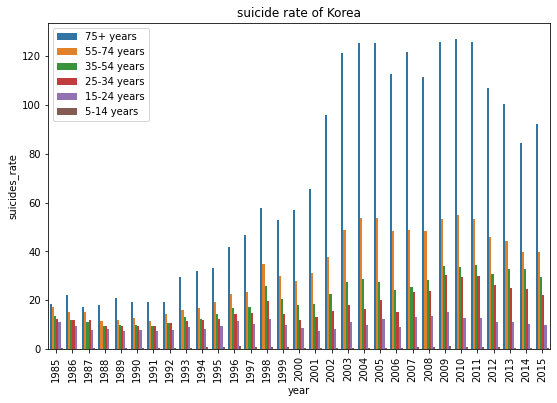

In [27]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_rate", hue="age",
            ci = None,data = df_kor )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

barplot으로 그려보니 다른 나이대의 자살률 또한 명확하게 볼 수 있게 되었다. 
또한 나이가 증가함에 따라 자살률 또한 차례로 증가하는 것을 볼 수 있다. 이를 통해 나이가 높아짐에 따라 자살 확률이 높아지는 것을 알 수 있었다.